In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# creating datasets
X = y = []
for i in range(10000):
    X.append(np.log([random.randint(1,100), random.randint(1,100)]))
y = [i[0] + i[1] for i in X]
y = np.array(y)
X = np.array(X)

In [3]:
# splitting dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
def baseline_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(2,), activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [5]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [6]:
regression = KerasRegressor(build_fn=baseline_model, epochs=100)

In [7]:
result = regression.fit(X_train, y_train)

Epoch 1/100
235/235 [==============================] - 0s 770us/step - loss: 20.7682
Epoch 2/100
235/235 [==============================] - 0s 830us/step - loss: 8.9788
Epoch 3/100
235/235 [==============================] - 0s 902us/step - loss: 3.5442
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 1.5263
Epoch 5/100
235/235 [==============================] - 0s 830us/step - loss: 0.9351
Epoch 6/100
235/235 [==============================] - 0s 809us/step - loss: 0.7812
Epoch 7/100
235/235 [==============================] - 0s 830us/step - loss: 0.7198
Epoch 8/100
235/235 [==============================] - 0s 877us/step - loss: 0.6702
Epoch 9/100
235/235 [==============================] - 0s 923us/step - loss: 0.6190
Epoch 10/100
235/235 [==============================] - 0s 800us/step - loss: 0.5654
Epoch 11/100
235/235 [==============================] - 0s 809us/step - loss: 0.5100
Epoch 12/100
235/235 [==============================] - 0s 783us/step - los

235/235 [==============================] - 0s 830us/step - loss: 1.6984e-11
Epoch 95/100
235/235 [==============================] - 0s 851us/step - loss: 5.3273e-08
Epoch 96/100
235/235 [==============================] - 0s 762us/step - loss: 5.5139e-08
Epoch 97/100
235/235 [==============================] - 0s 757us/step - loss: 1.1968e-07
Epoch 98/100
235/235 [==============================] - 0s 745us/step - loss: 2.0124e-08
Epoch 99/100
235/235 [==============================] - 0s 723us/step - loss: 1.3010e-07
Epoch 100/100
235/235 [==============================] - 0s 706us/step - loss: 1.0095e-09


In [8]:
y_pred = regression.predict(X_test)

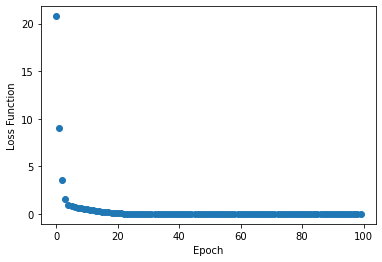

In [32]:
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.scatter([i for i in range(len(result.history['loss']))], result.history['loss'])
plt.show()

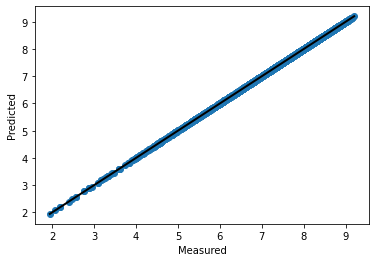

In [10]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'black', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [51]:
weights = regression.model.layers[0].get_weights()
w1 = weights[0][0]
w2 = weights[0][1]
bias = weights[1][0]
def predict_single_value(x,y,w1,w2,bias):
    print(f'(x:{x}, y:{y}) \t true : {x*y}\t predicted : {np.exp((w1*np.log(x) + w2*np.log(y) + bias)[0])}')

In [52]:
for i in range(100):
    predict_single_value(random.random()*100, random.random()*100, w1, w2, bias)

(x:1.3050975228229955, y:11.125979774667528) 	 true : 14.52048864289734	 predicted : 14.520482063293457
(x:51.79558186487547, y:98.11113872155161) 	 true : 5081.723517508281	 predicted : 5081.72607421875
(x:80.84821516429871, y:96.91229309299365) 	 true : 7835.18592404793	 predicted : 7835.18017578125
(x:16.539961220053957, y:96.07683415878175) 	 true : 1589.1071111318056	 predicted : 1589.1075439453125
(x:33.19262486977149, y:72.81765460717878) 	 true : 2417.009093272673	 predicted : 2417.0087890625
(x:74.44116465344185, y:17.44866848967127) 	 true : 1298.8992040229414	 predicted : 1298.8997802734375
(x:80.81951861700665, y:78.55722681307446) 	 true : 6348.9572549196855	 predicted : 6348.9599609375
(x:25.297970849394346, y:40.06061048566056) 	 true : 1013.4521562751823	 predicted : 1013.4522094726562
(x:27.457145364385138, y:82.37437006333256) 	 true : 2261.7650531285776	 predicted : 2261.76513671875
(x:32.67875736328813, y:51.675123807837394) 	 true : 1688.6788326341918	 predicted : 